In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize

In [3]:
def SIR_Demo():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    #Setup the ODE
    def ode(t, y):
        return np.array([-y[0] * y[1], y[0] * y[1] - (1/3) * y[1], (1/3) * y[1]])

    #Hyperparameters
    t0 = 0
    tf = 50
    x_space = np.linspace(0, 50, 150)
    
    #Define y0 and solution
    y0 = np.array([(3000000 - 5) / 3000000, 5/3000000, 0])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Susceptible')
    plt.plot(x_space, sol.y[1],  label='Infected')
    plt.plot(x_space, sol.y[2],  label='Recovered')
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.show()
    

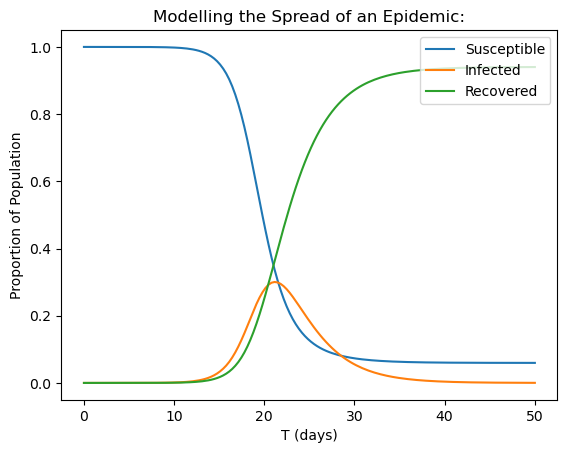

In [4]:
SIR_Demo()

In [5]:
def first_model():
    
    n = 5
    K = 2/3
    alpha_values = np.random.rand(5)
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5)
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        # if t >= 60 and t <= 70:
        #     index = np.argmax(y)
        #     temp_alpha = alpha_values[index]
        #     alpha_values[index] = 0
        for i in range(5):
            dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i]))
        # if t >= 60 and t <= 70:
        #     alpha_values[index] = temp_alpha
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Company 1, alpha = ' + str(alpha_values[0]))
    plt.plot(x_space, sol.y[1],  label='Company 2, alpha = ' + str(alpha_values[1]))
    plt.plot(x_space, sol.y[2],  label='Company 3, alpha = ' + str(alpha_values[2]))
    plt.plot(x_space, sol.y[3],  label='Company 4, alpha = ' + str(alpha_values[3]))
    plt.plot(x_space, sol.y[4],  label='Company 5, alpha = ' + str(alpha_values[4]))
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.ylim(0, 1)
    plt.show()

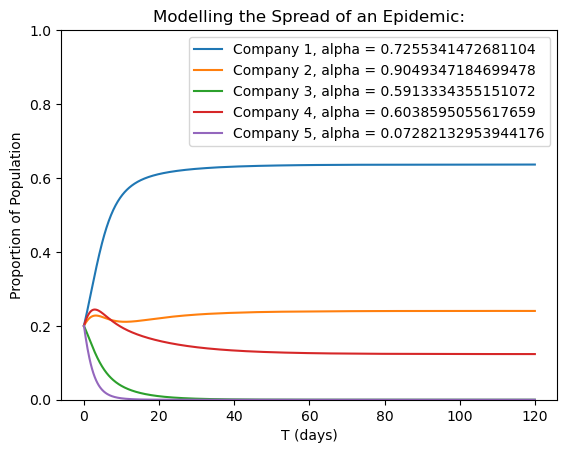

In [6]:
first_model()

# Shock Models

# Company Scandal

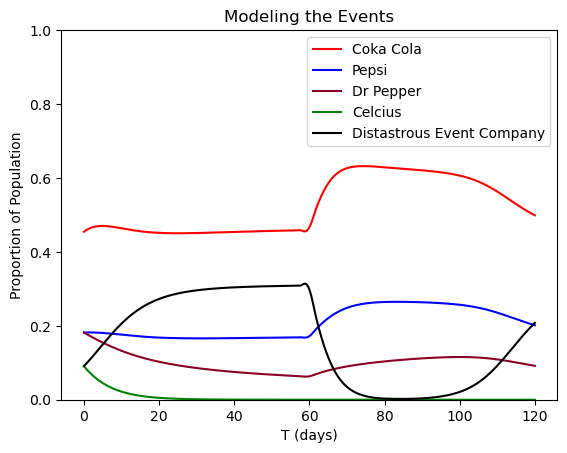

In [104]:
def event_based_model():
    
    n = 5
    K = 2/3
    # alpha_values = np.random.rand(5)
    alpha_values = np.array([0.5, 0.4, 0.35, 0.2, 0.5])
    beta_values = np.array([[0.5, -0.1, 0.3, 0.3, 0.3],
                            [0.3, 0.5, 0.3, 0.3, 0.3],
                            [0.3, 0.3, 0.5, 0.3, 0.3],
                            [0.3, 0.3, 0.3, 0.5, 0.3],
                            [0.3, 0.3, 0.3, 0.3, 0.3]])
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)

        # Event: Company 3 (index 2) performs poorly between t=60 and t=75
        temporary_alpha = alpha_values.copy()  # Copy to modify for events
        if 60 <= t <= 75:
            temporary_alpha[4] *= 0.1  # Reduce Company 3's growth rate significantly
        if 75 <= t <= 90:
            temporary_alpha[4] *= 0.1 * 10 * (t - 75) / 15  # Increase Company 3's growth rate linearly

        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.5, 0.2, 0.2, 0.1, 0.1])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Coka Cola', color='red')
    plt.plot(x_space, sol.y[1],  label='Pepsi', color='blue')
    plt.plot(x_space, sol.y[2],  label='Dr Pepper', color='#890024')
    plt.plot(x_space, sol.y[3],  label='Celcius', color='green')
    plt.plot(x_space, sol.y[4],  label="Distastrous Event Company", color='black')
    plt.ylabel("Proportion of Population")
    # plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modeling the Events")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
    
event_based_model()

When a company experiences significant losses due to a public incident, such as a scandal or sudden negative news, its market share is likely to decline, at least temporarily. This drop can result from negative public opinion, financial or operational setbacks, or declining stock prices. In the model above, the company’s growth rate was sharply reduced for a period, reflecting the time it may take to recover from such an event, which could span months or even years. Meanwhile, the other companies in the market experienced slight increases in their market share, highlighting how such incidents can create opportunities for competitors to gain an advantage.

# Entering Competitor

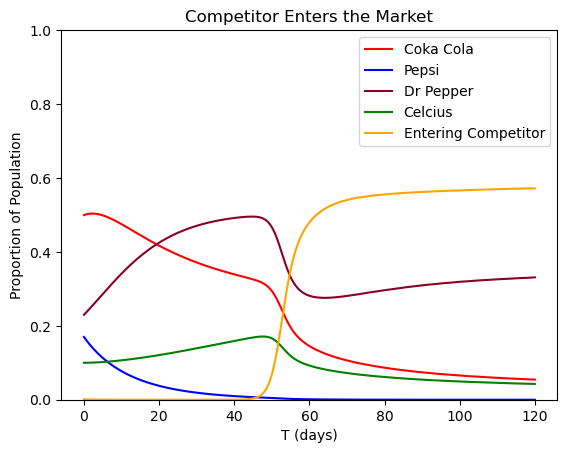

In [103]:
def event_based_model():
    
    n = 5
    K = 2/3
    # alpha_values = np.random.rand(5)
    alpha_values = np.array([0.3, 0.2, 0.4, 0.3, 0.0001])
    beta_values = np.array([[0.5, -0.1, 0.3, 0.3, 0.3],
                            [0.3, 0.5, 0.3, 0.3, 0.3],
                            [0.3, 0.3, 0.5, 0.3, 0.3],
                            [0.3, 0.3, 0.3, 0.5, 0.3],
                            [0.3, 0.3, 0.3, 0.3, 0.3]])
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        temporary_alpha = alpha_values.copy()
        # Event: Company 3 (index 2) performs poorly between t=60 and t=75
        if t > 30: # Event starts
            temporary_alpha[4] =  0.9
            

        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 120
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    y0 = np.array([0.5, 0.17, 0.23, 0.1, 0.001])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    plt.plot(x_space, sol.y[0],  label='Coka Cola', color='red')
    plt.plot(x_space, sol.y[1],  label='Pepsi', color='blue')
    plt.plot(x_space, sol.y[2],  label='Dr Pepper', color='#890024')
    plt.plot(x_space, sol.y[3],  label='Celcius', color='green')
    plt.plot(x_space, sol.y[4],  label="Entering Competitor", color='orange')
    plt.ylabel("Proportion of Population")
    # plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Competitor Enters the Market")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
    
event_based_model()

When a strong competitor enters the market with impactful marketing, such as viral backing or influencer endorsements, it can significantly disrupt the dynamics of the industry. As shown above, the relative market share of all existing companies declined at a similar rate, indicating that they collectively suffered losses due to the new entrant’s presence. Such events are becoming increasingly common with the rise of social media influencers and the potential for viral videos and trends to rapidly amplify a brand’s visibility and appeal.

# Merger / Acquisition

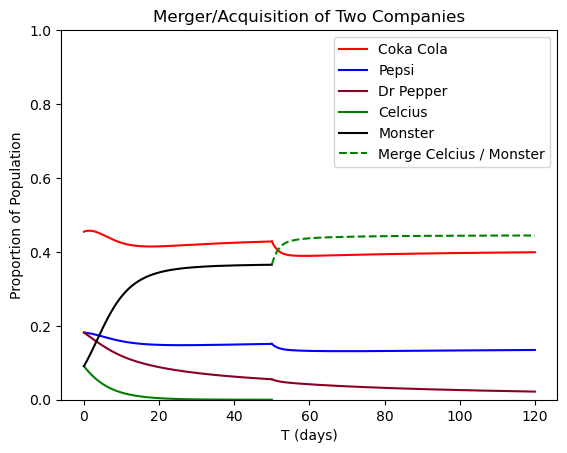

In [100]:
def event_based_model():
    
    n = 5
    K = 2/3
    # alpha_values = np.random.rand(5)
    alpha_values = np.array([0.5, 0.4, 0.35, 0.2, 0.6])
    beta_values = np.array([[0.5, -0.1, 0.3, 0.3, 0.3],
                            [0.3, 0.5, 0.3, 0.3, 0.3],
                            [0.3, 0.3, 0.5, 0.3, 0.3],
                            [0.3, 0.3, 0.3, 0.5, 0.3],
                            [0.3, 0.3, 0.3, 0.3, 0.3]])
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode_premerger(t, y):
        dydt = np.zeros(5)
        temporary_alpha = alpha_values.copy()  # Copy to modify for events

        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt
    
    alpha_values_merger = np.array([0.5, 0.4, 0.35, 0.9])
    beta_values_merger = np.array([[0.5, -0.1, 0.3, 0.3],
                                    [0.3, 0.5, 0.3, 0.3],
                                    [0.3, 0.3, 0.5, 0.3],
                                    [0.3, 0.3, 0.3, 0.5]])
    
    def ode_merger(t, y):
        dydt = np.zeros(4)
        temporary_alpha = alpha_values_merger.copy()  # Copy to modify for events

        for i in range(4):
            competitive_term = np.sum([beta_values_merger[i, j] * y[j] for j in range(4) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 50
    tf_merger = 120
    x_space_premerger = np.linspace(0, tf, 500)
    x_space_merger = np.linspace(tf, tf_merger, 500)
    
    #Define y0 and solution
    y0 = np.array([0.5, 0.2, 0.2, 0.1, 0.1])
    sol = solve_ivp(ode_premerger, (t0, tf), y0, t_eval=np.linspace(t0, tf, 500))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    y0_merger = np.ones(4)
    y0_merger[0] = sol.y[0][-1]
    y0_merger[1] = sol.y[1][-1]
    y0_merger[2] = sol.y[2][-1]
    y0_merger[3] = sol.y[3][-1] + sol.y[4][-1]
    sol_merger = solve_ivp(ode_merger, (tf, tf_merger), y0_merger, t_eval=np.linspace(tf, tf_merger, 500))
    sol_merger.y = sol_merger.y / np.sum(sol_merger.y, axis=0)
    
    #Plot the system
    plt.plot(x_space_premerger, sol.y[0],  label='Coka Cola', color='red')
    plt.plot(x_space_premerger, sol.y[1],  label='Pepsi', color='blue')
    plt.plot(x_space_premerger, sol.y[2],  label='Dr Pepper', color='#890024')
    plt.plot(x_space_premerger, sol.y[3],  label='Celcius', color='green')
    plt.plot(x_space_premerger, sol.y[4],  label="Monster", color='black')
    plt.plot(x_space_merger, sol_merger.y[0], color='red')
    plt.plot(x_space_merger, sol_merger.y[1], color='blue')
    plt.plot(x_space_merger, sol_merger.y[2], color='#890024')
    plt.plot(x_space_merger, sol_merger.y[3],  label='Merge Celcius / Monster', color='green', linestyle='--')
    plt.ylabel("Proportion of Population")
    # plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Merger/Acquisition of Two Companies")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
    
event_based_model()

Companies are merged frequently. There will be merger events when a company will buy out a company to grow their own spread and net worth. In the example above, a strong company buys out an almost failed company and uses their rights and inventory to take advantage of the market. The result is indicated by a decrease proportional to company size. This is an interesting and common phenomena that can occur in many different market sectors. 

# Solving for B

[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0. 0. 0. 0. 0.]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 1.11022302e-17 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 1.11022302e-17 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 1.11022302e-17 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0. 0. 0. 0. 0.]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.35296934 0.22725271]
[0.00000000e+00 3.33066907e-17 1.11022302e-17 0.00000000e+00
 0.00000000e+00]
[0.71374346 0.73128601 0.76705709 0.352969

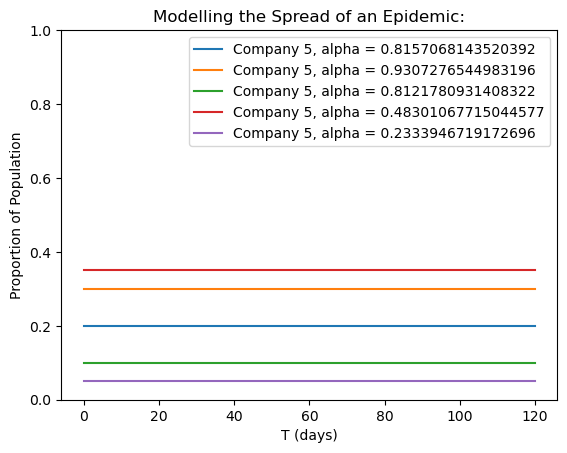

In [8]:
def third_model():
    
    n = 5
    K = 2/3
    alpha_values = np.random.rand(n)
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        
            
        
        dydt = np.zeros(n)
        for i in range(n):
            beta_values = np.random.rand(n)
            for j in range(n):
                beta_values[j] = (alpha_values[j] * (1 - y[j] / K)) / np.sum([y[k] for k in range(5) if k != j])
            print(beta_values)
            dydt[i] = y[i] * (alpha_values[i] * (1 - y[i] / K) - np.sum([beta_values[i] * y[j] for j in range(5) if j != i]))
            print(dydt)
        return dydt

    t0 = 0
    tf = 120
    t_step = 1000
    x_space = np.linspace(0, tf, t_step)
    
    #Define y0 and solution
    y0 = np.array([0.2, 0.3, 0.1, 0.35, 0.05])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, t_step))
    
    #Plot the system
    for i in range(n):
        plt.plot(x_space, sol.y[i],  label=f'Company {n}, alpha = ' + str(alpha_values[i]))
    plt.ylabel("Proportion of Population")
    plt.legend(loc='upper right')
    plt.xlabel("T (days)")
    plt.title("Modelling the Spread of an Epidemic:")
    plt.ylim(0, 1)
    plt.show()
third_model()